# Mask RCNN

### Import libraries

In [1]:
from numpy import asarray
import numpy as np
from numpy import expand_dims
from numpy import zeros

import os

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

from xml.etree import ElementTree as ET

import mrcnn.model as modellib
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.model import load_image_gt
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
from mrcnn.utils import compute_ap

import keras
from keras import backend as K
import tensorflow as tf

from socketClass import *

import cv2
import math

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

### Load Data

In [2]:
dataset_dir = "/Users/wolfsinem/Downloads/socketdata"

#### Training

In [3]:
train_set = SocketDataset()

train_set.load_dataset(dataset_dir, is_train=True, train_max=1373)
train_set.prepare()

print('There are: {} training images'.format(len(train_set.image_ids)))

There are: 1372 training images


#### Validation

In [4]:
# val set
test_set = SocketDataset()

test_set.load_dataset(dataset_dir, is_train=False, train_max=1373)
test_set.prepare()

print("There are: {} validation images".format(len(test_set.image_ids)))

There are: 800 validation images


### Example image

(480, 480, 3)


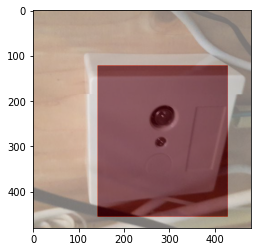

In [5]:
image_id = 111
image = train_set.load_image(image_id)
print(image.shape)

mask, class_ids = train_set.load_mask(image_id, image)

plt.imshow(image)
plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.show()

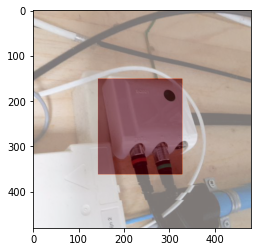

In [6]:
image_id = 666
image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id, image)

plt.imshow(image)
plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.show()

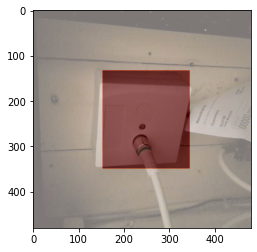

In [7]:
image_id = 320
image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id, image)
 
plt.imshow(image)
plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.show()

In [8]:
print(mask.shape)

(480, 480, 1)


In [9]:
print(image.shape)

(480, 480, 3)


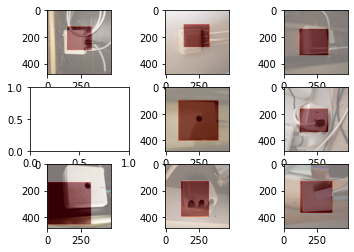

In [54]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    if i == 3:
        continue
    image = train_set.load_image(i)
    mask, class_ids = train_set.load_mask(i, image)

    plt.imshow(image)
    for j in range(mask.shape[2]):
        plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.show()

In [66]:
# # enumerate all images in the dataset
# for image_id in train_set.image_ids:
# 	# load image info
# 	info = train_set.image_info[image_id]
# 	# display on the console
# 	# print(info)


In [63]:
image_id = 5
image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id, image)
bbox = extract_bboxes(mask)

In [64]:
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)

AssertionError: 

## TEST

In [16]:
ROOT_DIR = os.path.abspath("./")
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")
COCO_WEIGHTS_PATH = "/Users/wolfsinem/maskrcnn/mask_rcnn_coco.h5"

In [17]:
class PredictionConfig(Config):
    NAME = "Socket Detection"
    NUM_CLASSES = 15 + 1
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [18]:
config = PredictionConfig()
model = MaskRCNN(mode="training", config=config,
                                  model_dir=DEFAULT_LOGS_DIR)

In [19]:
weights_path = COCO_WEIGHTS_PATH

model.load_weights(weights_path, by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])

In [65]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=2, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /Users/wolfsinem/maskrcnn/logs/socket detection20210514T0139/mask_rcnn_socket detection_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (Tim

IndexError: boolean index did not match indexed array along dimension 0; dimension is 15 but corresponding boolean dimension is 1